Nama: Muhammad Zulfan Hamka \
Npm: 623220028 \
Topik : Machine Learning


##Import Liblary

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_excel('/content/drive/MyDrive/latihan/latihan/BI/titanicasli.xlsx')
df.head(10)

,IdPenumpang,Selamat,KelasTiket,Nama,Gender,Usia,JmlSaudara,JmlAnak,NoTiket,HargaTiket,KodeKursi,AsalKeberangkatan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
df.drop(['IdPenumpang', 'Nama', 'NoTiket', 'KodeKursi'], axis=1, inplace=True)

In [77]:
df.head()

,Selamat,KelasTiket,Gender,Usia,JmlSaudara,JmlAnak,HargaTiket,AsalKeberangkatan
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selamat            891 non-null    int64  
 1   KelasTiket         891 non-null    int64  
 2   Gender             891 non-null    object 
 3   Usia               714 non-null    float64
 4   JmlSaudara         891 non-null    int64  
 5   JmlAnak            891 non-null    int64  
 6   HargaTiket         891 non-null    float64
 7   AsalKeberangkatan  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##Preprocessing

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selamat            891 non-null    int64  
 1   KelasTiket         891 non-null    int64  
 2   Gender             891 non-null    object 
 3   Usia               714 non-null    float64
 4   JmlSaudara         891 non-null    int64  
 5   JmlAnak            891 non-null    int64  
 6   HargaTiket         891 non-null    float64
 7   AsalKeberangkatan  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [80]:
# Menangani missing values
df['AsalKeberangkatan'] = df['AsalKeberangkatan'].fillna(df['Usia'].mean())
df['Usia'] = df['Usia'].fillna(df['Usia'].mean())

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selamat            891 non-null    int64  
 1   KelasTiket         891 non-null    int64  
 2   Gender             891 non-null    object 
 3   Usia               891 non-null    float64
 4   JmlSaudara         891 non-null    int64  
 5   JmlAnak            891 non-null    int64  
 6   HargaTiket         891 non-null    float64
 7   AsalKeberangkatan  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [82]:
# Mendefinisikan kolom fitur dan target
df_features = df.drop('Selamat', axis=1)
df_target = df['Selamat']

In [83]:
df_features

,KelasTiket,Gender,Usia,JmlSaudara,JmlAnak,HargaTiket,AsalKeberangkatan
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


###encoding

In [84]:
# Mengubah tipe data menjadi category
df_features[['AsalKeberangkatan','Gender']] = df_features[['AsalKeberangkatan','Gender']].astype('category')

# Cek hasil perubahan tipe data
df_features[['AsalKeberangkatan','Gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   AsalKeberangkatan  891 non-null    category
 1   Gender             891 non-null    category
dtypes: category(2)
memory usage: 2.2 KB


In [85]:
# Encoding data dengan .cat.codes
df_features['AsalKeberangkatan'] = df_features['AsalKeberangkatan'].cat.codes
df_features['Gender']= df_features['Gender'].cat.codes

In [86]:
df_features.tail()

,KelasTiket,Gender,Usia,JmlSaudara,JmlAnak,HargaTiket,AsalKeberangkatan
886,2,1,27.000000,0,0,13.00,3
887,1,0,19.000000,0,0,30.00,3
888,3,0,29.699118,1,2,23.45,3
889,1,1,26.000000,0,0,30.00,1
890,3,1,32.000000,0,0,7.75,2


###Normalisasi

In [87]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:5]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.58796609],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.91264387],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426,  0.58796609],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024,  0.58796609],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.58796609]])

In [88]:
# Mendefinisikan data target
y = df_target
y[0:5]

,Selamat
0,0
1,1
2,1
3,1
4,0


### Train test split

In [89]:
# Train test split untuk membagi data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


##Modeling

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
k = 5
# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
model_knn

KNeighborsClassifier()

In [92]:
# Menguji model dengan data testing
y_pred = model_knn.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [93]:
y_test[0:5]

,Selamat
590,0
131,0
628,0
195,1
230,1


In [94]:
# Mengukur kinerja model machine learning
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(y_train, model_knn.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  0.8553370786516854
Akurasi Test set:  0.8156424581005587


In [95]:
# Mencari nilai K dengan akurasi terbaik
Ks = 15
mean_acc = np.zeros((Ks-1))
for n in range(1, Ks):

    #Train Model and Predict
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    mean_acc




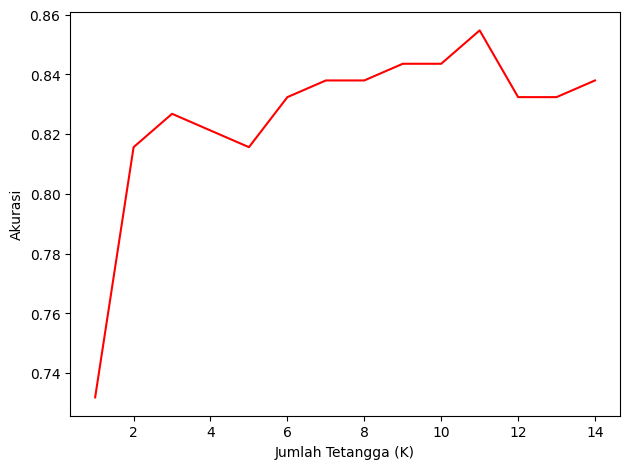

In [96]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

In [97]:
print('Akurasi terbaik adalah ', mean_acc.max(), 'dengan nilai k =', mean_acc.argmax()+1)

Akurasi terbaik adalah  0.8547486033519553 dengan nilai k = 11


In [103]:
 dfbaru =  df.to_csv('/content/titanicasli.xlsx')